## Data Loading

In [3]:
DATA_FOLDER = '../../twitter/data/'
VARIABLE_FOLDER = '../../twitter/variables/'
FIGURE_FOLDER = '../../twitter/reports/'

In [36]:
import numpy as np
import pandas as pd
import os

# Gather the data
# df = pd.read_csv(DATA_FOLDER + "processed/posts_and_comments.csv")
df = pd.read_csv(os.path.join(DATA_FOLDER, 'processed', 'tweets_sentiments.csv'))

In [37]:
# df = df.dropna()

In [38]:
df

,Unnamed: 0.1,Unnamed: 0,query,subreddit,type,author,content,date,upvotes,len_text,Topic,Group,Keywords,Date_year,negative,neutral,positive,net,net_t,topic
0,0,0,semaglutide,main,original,1666262312867725312,🤔 what happens when you stop taking it? #semag...,2023-07-31 00:34:51,0.0,12,7,3,"""effective"", ""semaglutide"", ""shortage"", ""issue...",2023,0.000379,0.999156,0.000465,1,0,7
1,1,1,semaglutide,main,original,415805183,"Idc what y’all say, I was pre diabetic so I go...",2023-07-31 00:12:24,0.0,50,7,3,"""effective"", ""semaglutide"", ""shortage"", ""issue...",2023,0.001558,0.998013,0.000428,1,0,7
2,2,2,semaglutide,main,retweet,232578837,I have a patient who was able to come off of ...,2023-07-31 00:00:16,0.0,25,18,1,"""glyburide"", ""able"", ""low"", ""metformin"", ""a1c""",2023,NaN,NaN,NaN,0,-1,18
3,3,3,semaglutide,main,original,1574182368965017600,"If you’re not in the know, most people on it f...",2023-07-30 23:50:33,0.0,53,8,3,"""private"", ""snapped"", ""pound"", ""shed"", ""illness""",2023,0.000451,0.999122,0.000426,1,0,8
4,4,4,semaglutide,main,retweet,784348606488776704,New systematic review and meta-analysis: RCT ...,2023-07-30 23:46:09,0.0,17,14,2,"""16"", ""analysis"", ""systematic"", ""meta"", ""13""",2023,0.000763,0.998374,0.000863,1,0,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1218,1218,27,retatrutide,main,original,469509187,Exciting News in Obesity Treatment! Two new br...,2023-07-24 23:00:06,0.0,37,0,3,"""agonists"", ""glp1"", ""1ra"", ""glp"", ""receptor""",2023,0.000298,0.993521,0.006181,1,0,0
1219,1219,28,retatrutide,main,retweet,948882018103947264,Exciting News in Obesity Treatment! Two groun...,2023-07-24 21:12:56,0.0,17,10,2,"""triple"", ""groundbreaking"", ""lowering"", ""fight...",2023,NaN,NaN,NaN,0,-1,10
1220,1220,29,retatrutide,main,original,469509187,Exciting News in Obesity Treatment! Two ground...,2023-07-24 21:00:30,0.0,31,10,2,"""triple"", ""groundbreaking"", ""lowering"", ""fight...",2023,0.000392,0.986812,0.012796,1,0,10
1221,1221,30,retatrutide,main,original,1571959463258783744,Lilly's Most Potent Weight Loss Drug Yet Could...,2023-07-24 13:20:10,0.0,44,10,2,"""triple"", ""groundbreaking"", ""lowering"", ""fight...",2023,0.000491,0.998351,0.001158,1,0,10


In [40]:
pd.to_datetime(df['date']).dt.day

0       31
1       31
2       31
3       30
4       30
        ..
1218    24
1219    24
1220    24
1221    24
1222    24
Name: date, Length: 1223, dtype: int64

In [41]:
# df['date'] = pd.to_datetime(df['date'])
df['date_day'] = pd.to_datetime(df['date']).dt.day
days = np.array(df['date_day'].unique(), dtype='int')

In [42]:
days

array([31, 30, 29, 28, 27, 26, 25, 24])

In [43]:
df.head()

,Unnamed: 0.1,Unnamed: 0,query,subreddit,type,author,content,date,upvotes,len_text,...,Group,Keywords,Date_year,negative,neutral,positive,net,net_t,topic,date_day
0,0,0,semaglutide,main,original,1666262312867725312,🤔 what happens when you stop taking it? #semag...,2023-07-31 00:34:51,0.0,12,...,3,"""effective"", ""semaglutide"", ""shortage"", ""issue...",2023,0.000379,0.999156,0.000465,1,0,7,31
1,1,1,semaglutide,main,original,415805183,"Idc what y’all say, I was pre diabetic so I go...",2023-07-31 00:12:24,0.0,50,...,3,"""effective"", ""semaglutide"", ""shortage"", ""issue...",2023,0.001558,0.998013,0.000428,1,0,7,31
2,2,2,semaglutide,main,retweet,232578837,I have a patient who was able to come off of ...,2023-07-31 00:00:16,0.0,25,...,1,"""glyburide"", ""able"", ""low"", ""metformin"", ""a1c""",2023,NaN,NaN,NaN,0,-1,18,31
3,3,3,semaglutide,main,original,1574182368965017600,"If you’re not in the know, most people on it f...",2023-07-30 23:50:33,0.0,53,...,3,"""private"", ""snapped"", ""pound"", ""shed"", ""illness""",2023,0.000451,0.999122,0.000426,1,0,8,30
4,4,4,semaglutide,main,retweet,784348606488776704,New systematic review and meta-analysis: RCT ...,2023-07-30 23:46:09,0.0,17,...,2,"""16"", ""analysis"", ""systematic"", ""meta"", ""13""",2023,0.000763,0.998374,0.000863,1,0,14,30


## Visualization Settings

In [44]:
# import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

config = {
    'axis_label': 14,
    'tick_label': 12,
    'title': 20,
    'subplot_title': 16,
}

# Set the theme without grid
sns.set_style("white")

# Set your desired palette
my_palette = sns.color_palette("Paired")

# Set the palette for all figures
sns.set_palette(my_palette)


## Data Exploration

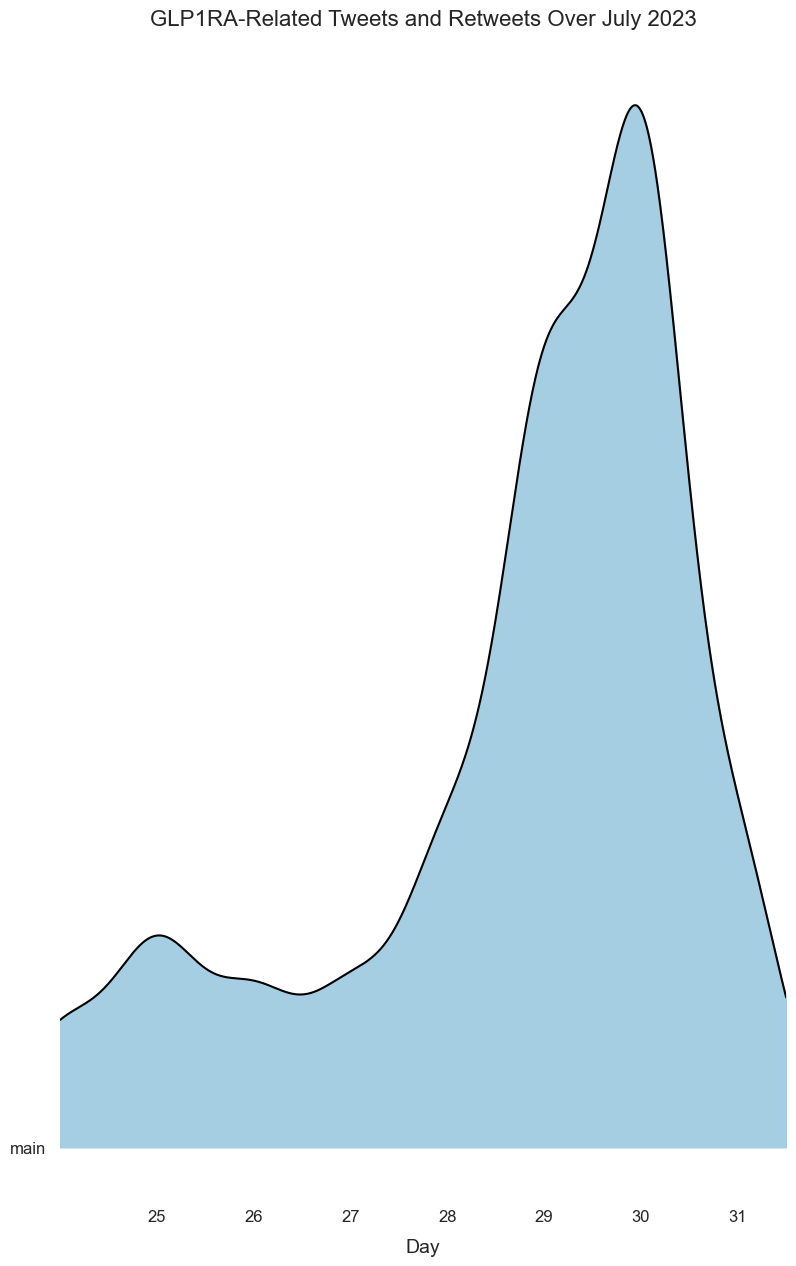

In [45]:
from joypy import joyplot

fig1b, ax1b = joyplot(df.groupby('subreddit', sort=True), column='date_day',
                      ylim='own', overlap=0, figsize=(8, 12),
                      fade=False, x_range=(days.min(), days.max() + 0.5),
                      )

# ax1b[-1].set_xticks(years)
ax1b[-1].set_xticklabels(ax1b[-1].get_xticklabels(), fontsize=config['tick_label'])
ax1b[-1].set_xlabel('Day', fontsize=config['axis_label'], labelpad=10)

for ax1bi in ax1b:
    ax1bi.set_yticklabels(ax1bi.get_yticklabels(), fontsize=config['tick_label'])

ax1b[0].set_title('GLP1RA-Related Tweets and Retweets Over July 2023', fontsize=config['subplot_title'], pad=20)

plt.savefig(os.path.join(FIGURE_FOLDER, 'figures', 'Twitter GLP1RA-Related Tweets and Retweets Over July 2023.svg'), bbox_inches='tight', transparent=True)

## Hierarchy Visualization

In [6]:
import pickle
import gzip

with gzip.open(os.path.join(VARIABLE_FOLDER, "tweets_topic_model_object_save.gz"), "rb") as f:
    topic_model = pickle.load(f)

In [47]:
def create_figure_2a():

    fig2a = topic_model.visualize_hierarchy(custom_labels=True)

    fig2a = fig2a.update_layout(plot_bgcolor="white",
                                title_font={'size': 1.23 * config['subplot_title']})

    fig2a = fig2a.update_xaxes(tickfont={'size': 1.23 * config['tick_label']},
                               title_font={'size': 1.23 * config['axis_label']})
    fig2a = fig2a.update_yaxes(tickfont={'size': 1.23 * config['tick_label']},
                               title_font={'size': 1.23 * config['axis_label']})

    fig2a.write_image(os.path.join(FIGURE_FOLDER, 'figures', 'Tweets Hierarchical Clustering.svg'))

    return fig2a

In [48]:
create_figure_2a()

## Topic Clustering

In [49]:
import os

In [53]:
with open(os.path.join(VARIABLE_FOLDER, "tweets_c_tf_idf_embed_vis.pkl"), "rb") as f:
    c_tf_idf_embed_vis = pickle.load(f)

with open(os.path.join(VARIABLE_FOLDER, "tweets_c_tf_idf_embed_clust.pkl"), "rb") as f:
    c_tf_idf_embed_clust = pickle.load(f)

with open(os.path.join(VARIABLE_FOLDER, "tweets_ideal_n_clusters.pkl"), "rb") as f:
    ideal_n_clusters = pickle.load(f)

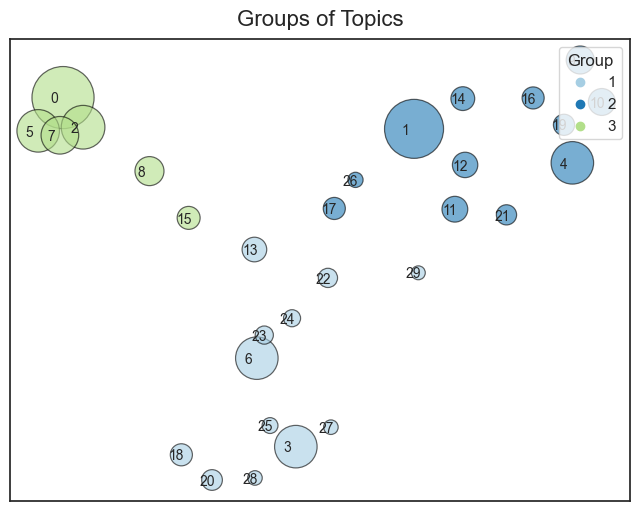

In [55]:
with sns.plotting_context('notebook'):
    # sns.set_style('white')
    plt.figure(figsize=(8,6))
    # Extract the values from the arrays-like objects
    x_values, y_values = c_tf_idf_embed_vis.T
    # print(len(x_values))
    # print(len(y_values))
    # Get the size and hue values
    sizes = topic_model.get_topic_info()['Count'].values
    hue_values = c_tf_idf_embed_clust[:len(x_values)]
    # print(len(sizes))
    # print((len(hue_values)))

    # Create the scatter plot
    ax = sns.scatterplot(x=x_values, y=y_values, size=sizes, hue=hue_values,
                         sizes=(100, 2000), alpha=0.6,
                         legend=True, edgecolor='k', palette='Paired')
    h, l = ax.get_legend_handles_labels()
    for i, coords in enumerate(c_tf_idf_embed_vis):
        ax.annotate(i, coords - [0.09, 0.05], fontsize=10)
    plt.legend(h[0:ideal_n_clusters], l[0:ideal_n_clusters], title='Group', loc=1)
    ax.set_title('Groups of Topics', fontsize=config['subplot_title'], pad=10)
    # ax.set_xlabel('Feature 1')
    # ax.set_ylabel('Feature 2')
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    plt.savefig(os.path.join(FIGURE_FOLDER, 'figures', 'Tweets Topics Grouped by Similarity of Content.svg'),  bbox_inches='tight', transparent=True)
    plt.show(ax)

In [13]:
# with open(os.path.join(VARIABLE_FOLDER, "subreddit_by_cluster.pkl"), "rb") as f:
    # subreddit_by_cluster = pickle.load(f)

In [ ]:
# with sns.plotting_context('notebook'):
#     # sns.set_style('ticks')
#     plt.figure(figsize=(8,6))
#     # Extract the values from the arrays-like objects
#     x_values, y_values = c_tf_idf_embed_vis.T
#     # print(len(x_values))
#     # print(len(y_values))

#     # Get the size and hue values
#     sizes = topic_model.get_topic_info()['Count'].values
#     # print(len(sizes))
#     hue_values = subreddit_by_cluster
#     hue_values = ['r/' + hue_value for hue_value in hue_values]
#     # print(len(hue_values))

#     # Create the scatter plot
#     ax = sns.scatterplot(x=x_values, y=y_values, size=sizes, hue=hue_values,
#                          sizes=(100, 3000), alpha=0.5,
#                          legend=True, edgecolor='k', palette='Paired')
#     ax.set_title('Most Frequent Subreddit per Topic', {'fontsize': 16})
#     h, l = ax.get_legend_handles_labels()
#     for i, coords in enumerate(c_tf_idf_embed_vis):
#         ax.annotate(i, coords - [0.09, 0.05], fontsize=10)
#     plt.legend(h[0:-5], l[0:-5])
#     # ax.set_xlabel('Feature 1')
#     # ax.set_ylabel('Feature 2')
#     ax.set_xticklabels([])
#     ax.set_yticklabels([])
#     # Remove x ticks
#     plt.xticks([])
#     # Remove y ticks
#     plt.yticks([])
#     plt.savefig(FIGURE_FOLDER + 'figures/Most Frequent Subreddit per Topic.svg',  bbox_inches='tight', transparent=True)
#     plt.show(ax)

In [56]:
with open(os.path.join(VARIABLE_FOLDER, "tweets_unique_users_by_cluster_sample.pkl"), "rb") as f:
    unique_users_by_cluster = pickle.load(f)

## Trends

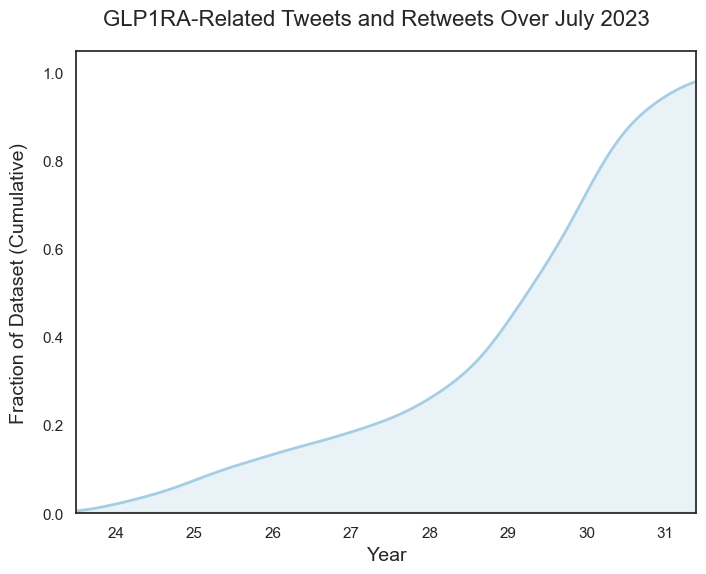

In [57]:
import seaborn as sns

with sns.plotting_context('notebook'):
    # sns.set_palette('autumn')
    fig, ax = plt.subplots(1, 1, figsize=(8, 6))

    sns.kdeplot(df['date_day'], linewidth=2, fill=True, cumulative=True, ax=ax)
    ax.set_xlabel('Year', fontsize=config['axis_label'])
    ax.set_xlim((days.min() - 0.5, days.max() + 0.5 - 0.1))
    ax.set_ylabel('Fraction of Dataset (Cumulative)', fontsize=config['axis_label'], labelpad=10)

    fig.suptitle('GLP1RA-Related Tweets and Retweets Over July 2023', fontsize=config['subplot_title'], y=0.95)

    plt.savefig(os.path.join(FIGURE_FOLDER, 'figures', 'Tweets GLP1RA-Related Tweets and Retweets Over July 2023.svg'), bbox_inches='tight', transparent=True)

In [17]:
if 0 in years:
    print('wrong')
    years = years[years != 0]

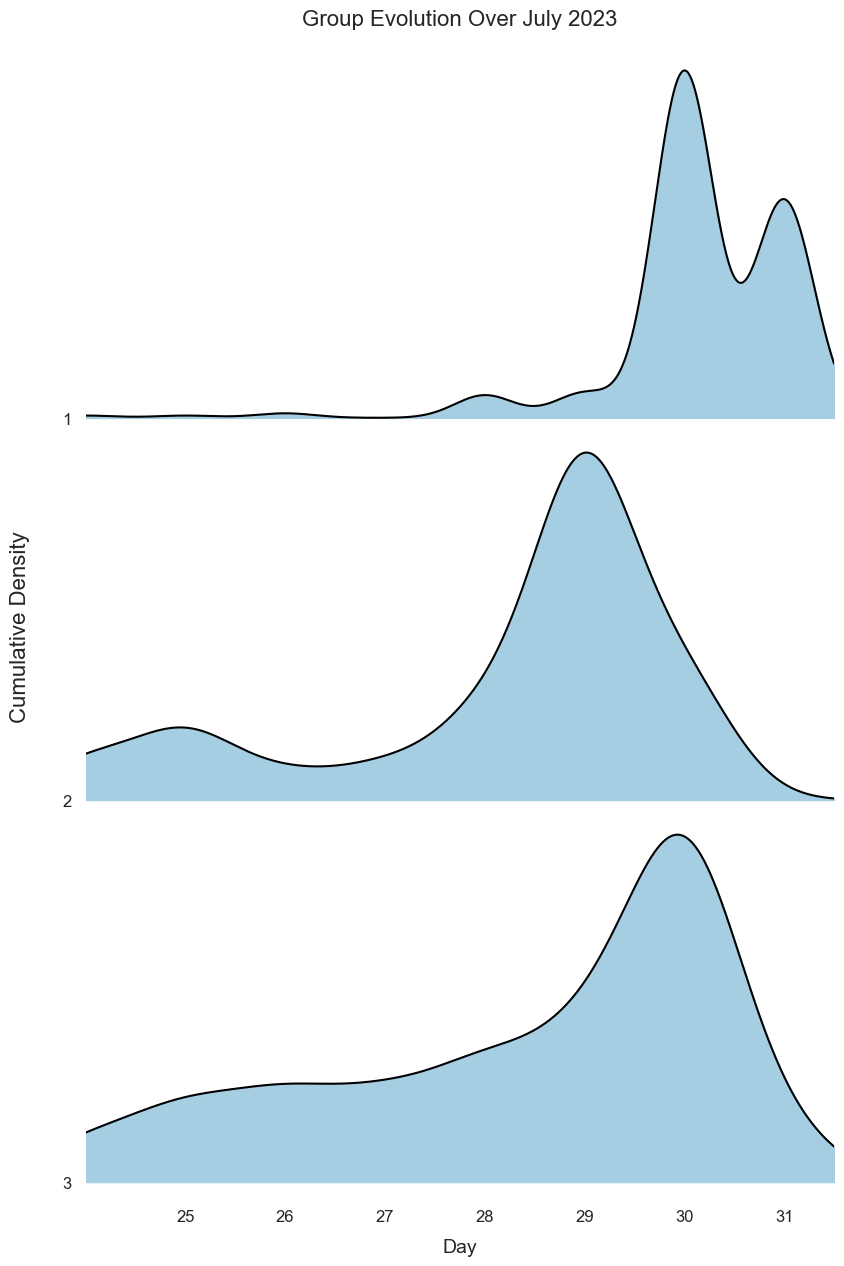

In [59]:
from joypy import joyplot

fig1b, ax1b = joyplot(df.groupby('Group', sort=True), column='date_day',
                      ylim='own', overlap=0, figsize=(8, 12),
                      fade=False, x_range=(days.min(), days.max() + 0.5),
                      )

# ax1b[0].set_ylabel("h")
# ax1b[0].yaxis.set_visible(True)
# ax1b[0].yaxis.set_ticks([0., 0.5, 1.0])
# ax1b[1].yaxis.set_visible(True)
# ax1b[2].yaxis.set_visible(True)
# ax1b[3].yaxis.set_visible(True)
# ax1b[4].yaxis.set_visible(True)

# ax1b[-1].set_xticks(years)
ax1b[-1].set_xticklabels(ax1b[-1].get_xticklabels(), fontsize=config['tick_label'])
ax1b[-1].set_xlabel('Day', fontsize=config['axis_label'], labelpad=10)

for ax1bi in ax1b:
    ax1bi.set_yticklabels(ax1bi.get_yticklabels(), fontsize=config['tick_label'])

ax1b[0].set_title('Group Evolution Over July 2023', fontsize=config['subplot_title'], pad=20)

ax1b[-1].set_ylabel('Cumulative Density', labelpad=40, fontsize=16)
# ax1b[-1].yaxis.set_label_position("left")
ax1b[-1].yaxis.set_visible(True)
ax1b[-1].yaxis.set_ticks([])
# ax1b.set_title('Group Evolution Over Time', fontsize=16, pad=10)


plt.savefig(os.path.join(FIGURE_FOLDER, 'figures', 'Tweets Groups GLP1RA-Related Tweets and Retweets Over July 2023.svg'), bbox_inches='tight', transparent=True)

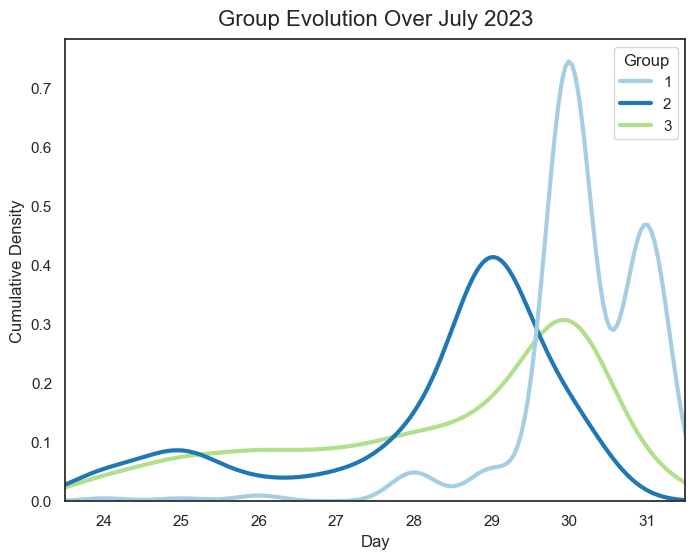

In [60]:
with sns.plotting_context('notebook'):

    fig, ax = plt.subplots(figsize=(8,6))
    ax = sns.kdeplot(data=df, x='date_day', hue='Group', common_norm=False, linewidth=3, ax=ax, palette='Paired')
    ax.set_xlabel('Day')
    ax.set_xticks(days)
    ax.set_xlim((days.min() - 0.5, days.max() + 0.5))
    ax.set_ylabel('Cumulative Density')
    ax.set_title('Group Evolution Over July 2023', fontsize=16, pad=10)
    fig.savefig(os.path.join(FIGURE_FOLDER, 'figures', 'Tweets Group Evolution Over July 2023.svg'),  bbox_inches='tight', transparent=True)

## Sentiment Analysis

In [61]:
with open(os.path.join(VARIABLE_FOLDER, "tweets_embeddings.pkl"), "rb") as f:
    embeddings = pickle.load(f)

In [ ]:
# (df.groupby('subreddit')['net_t']).describe().sort_values('subreddit')[['count', 'mean', 'std']].to_excel(
#     FIGURE_FOLDER + 'tables/SuppTable2.xlsx')

In [21]:
# (df.groupby('query')['net_t']).describe().sort_values('query')[['count', 'mean', 'std']].to_excel(
#     FIGURE_FOLDER + 'tables/SuppTable3.xlsx')

/var/folders/rh/hs8dxnxn2kqgzfnnmldh4v980000gn/T/ipykernel_1392/517704262.py:25: MatplotlibDeprecationWarning:

Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.



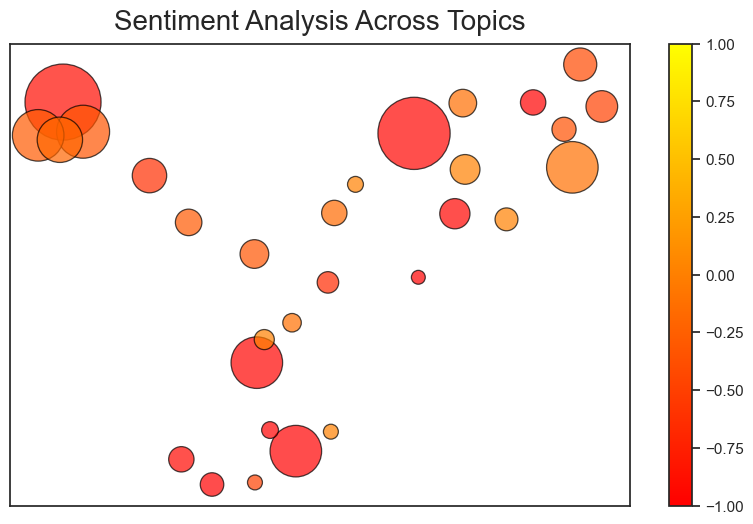

In [62]:
# sentiments = pd.read_excel('data/processed/sentiments.xlsx')

with sns.plotting_context('notebook'):
    sentiment = df.groupby('topic')['net_t'].mean()
    # print(sentiment.min(), sentiment.max())

    norm = plt.Normalize(-1, 1)
    sm = plt.cm.ScalarMappable(cmap="autumn", norm=norm)
    sm.set_array([])

    x_values, y_values = c_tf_idf_embed_vis.T

    # Get the size and hue values
    sizes = topic_model.get_topic_info()['Count'].values
    hue_values = sentiment

    plt.figure(figsize=(10,6))
    ax = sns.scatterplot(x=x_values, y=y_values, size=sizes, palette='autumn',
                         hue=hue_values, hue_norm=norm, sizes=(100, 3000),
                         alpha=0.7, legend=True, edgecolor='k')
    ax.set_title('Sentiment Analysis Across Topics', fontsize=config['title'], pad=10)

    # Remove the legend and add a colorbar
    ax.get_legend().remove()
    ax.figure.colorbar(sm)

    # ax.set_xlabel('Feature 1', fontsize=config['axis_label'])
    # ax.set_ylabel('Feature 2', fontsize=config['axis_label'])
    ax.set_xticklabels([])
    ax.set_yticklabels([])

    ax.tick_params(labelsize=config['tick_label'], top=False, bottom=False, left=False)

    plt.savefig(os.path.join(FIGURE_FOLDER, 'figures', 'Tweets Sentiment Analysis Across Topics.svg'), bbox_inches='tight', transparent=True)

## Dendogram

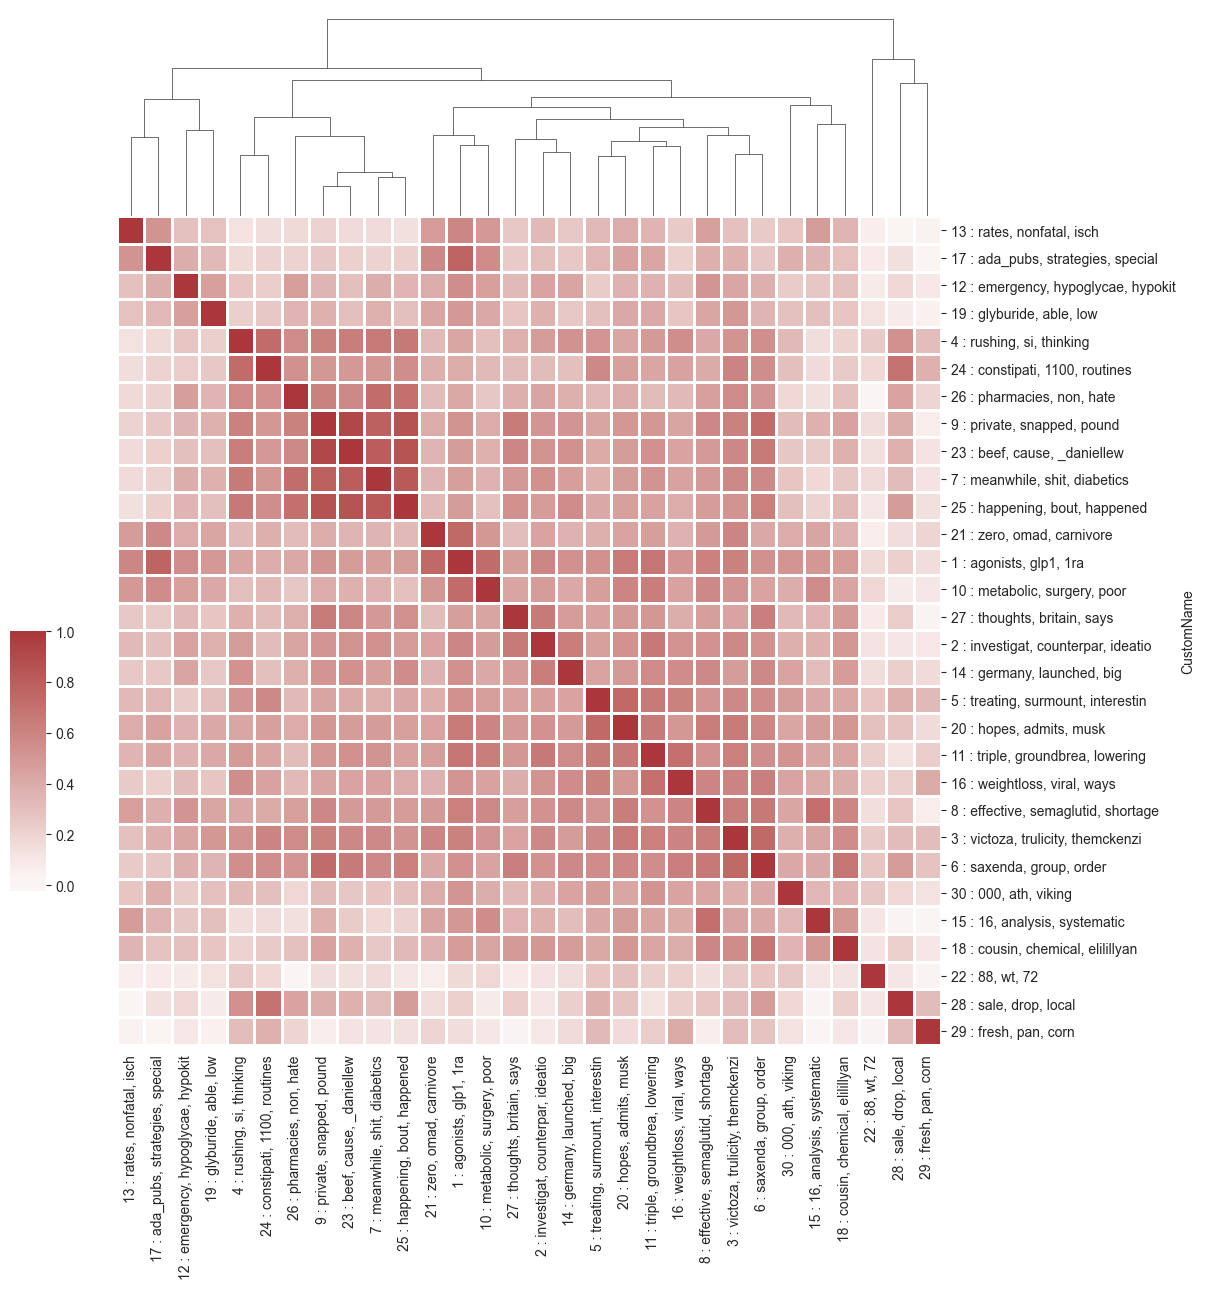

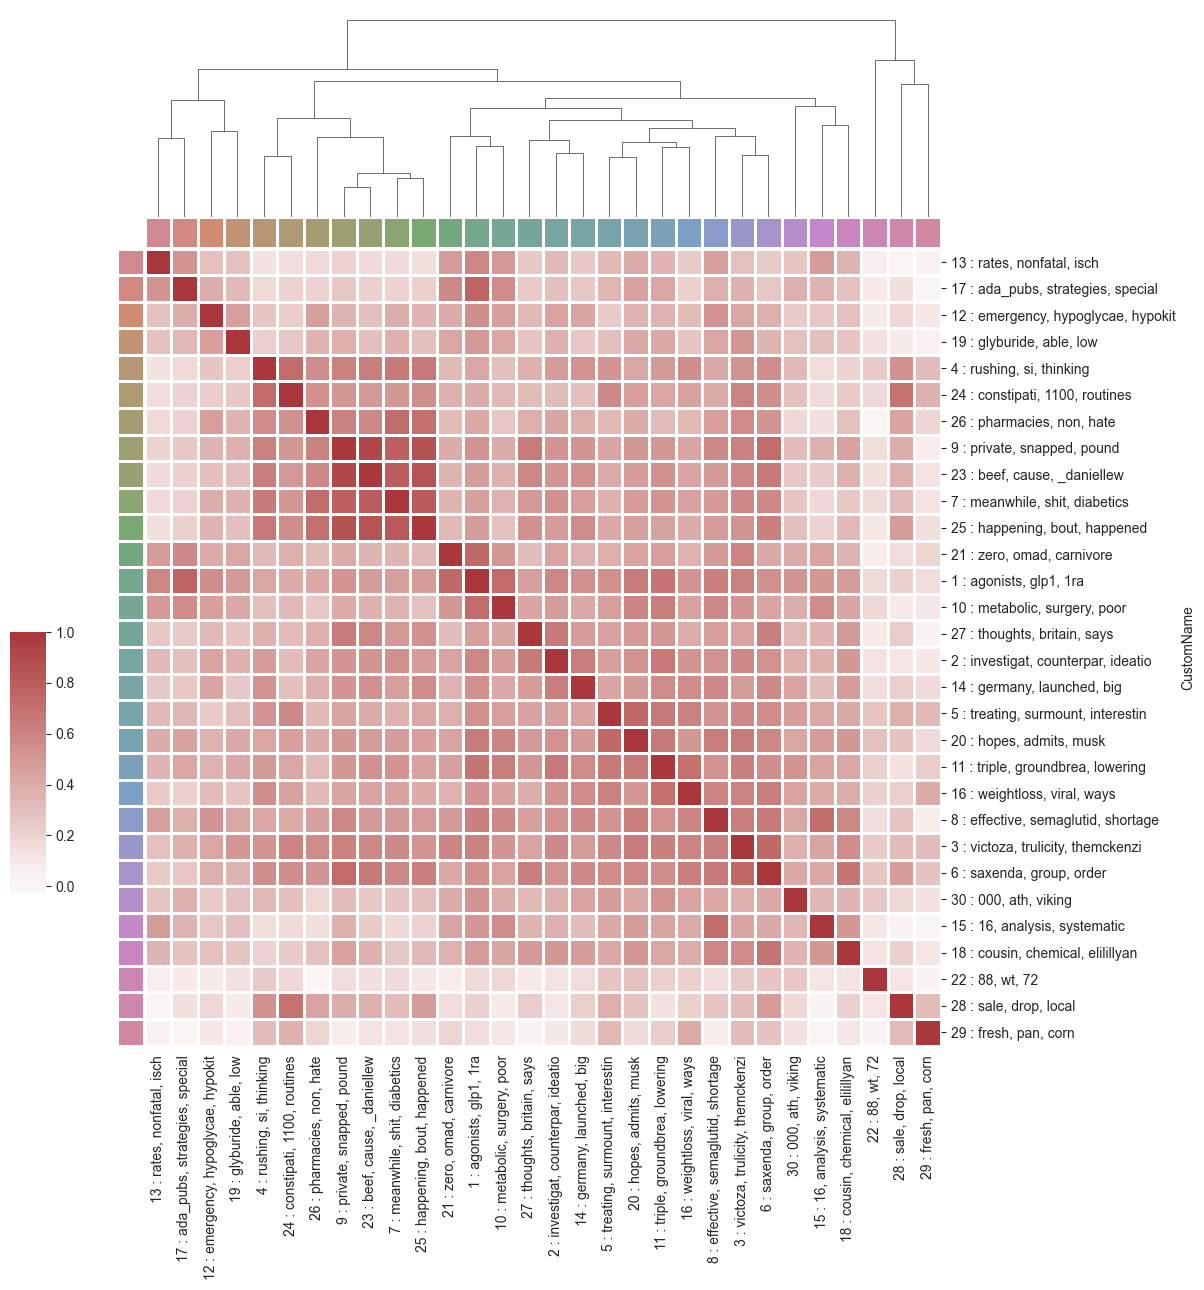

In [63]:
# Load your data from the CSV file
df = pd.read_csv(os.path.join(DATA_FOLDER, "processed", "tweets_distance.csv"), index_col='CustomName')

# Create a categorical palette
network_pal = sns.husl_palette(df.shape[0], s=.45)
network_lut = dict(zip(df.index, network_pal))

# Convert the palette to vectors that will be drawn on the side of the matrix
network_colors = df.index.map(network_lut)

# Draw the full plot
g = sns.clustermap(df, center=0, cmap="vlag",
                   # row_colors=network_colors, col_colors=network_colors,
                   dendrogram_ratio=(.1, .2),
                   cbar_pos=(0, .31, .03, .2),
                   linewidths=.75, figsize=(12, 13))

g.ax_row_dendrogram.remove()
# plt.title('Cosine Similarity between Topics')
# plt.xlabel('Topic')
# plt.ylabel('Topic')

# Display the plot
# plt.show()
# g.savefig('Dendogram.png', bbox_inches='tight', transparent=True)
# Assuming your plot is stored in the variable 'g'

x_tick_labels = [tick.get_text() for tick in g.ax_heatmap.get_xticklabels()]

# Display the x tick labels
# print(x_tick_labels)
network_lut = dict(zip(x_tick_labels, network_pal))
network_colors = df.index.map(network_lut)

# Draw the full plot
g = sns.clustermap(df, center=0, cmap="vlag",
                   row_colors=network_colors, col_colors=network_colors,
                   dendrogram_ratio=(.1, .2),
                   cbar_pos=(0, .31, .03, .2),
                   linewidths=.75, figsize=(12, 13))

g.ax_row_dendrogram.remove()
# plt.title('Cosine Similarity between Topics')
# plt.xlabel('Topic')
# plt.ylabel('Topic')

# Display the plot
plt.show()
g.savefig(os.path.join(FIGURE_FOLDER, 'figures', 'Tweets Dendogram.svg'), bbox_inches='tight', transparent=True)